In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Applications of clustering

### Example 1: Identifying patterns 

In [2]:
data = pd.read_csv('traffic.csv',parse_dates=True,index_col='Date')
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [3]:
data_table = pd.pivot_table(data = data, values = 'Fremont Bridge Total', index = data.index.time, columns = data.index.date)
data_table

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07,2012-10-08,2012-10-09,2012-10-10,2012-10-11,2012-10-12,...,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31
00:00:00,13.0,18.0,11.0,15.0,11.0,9.0,12.0,15.0,21.0,17.0,...,3.0,5.0,6.0,4.0,7.0,2.0,5.0,7.0,11.0,1.0
01:00:00,10.0,3.0,8.0,15.0,17.0,4.0,3.0,3.0,10.0,13.0,...,3.0,1.0,4.0,2.0,2.0,0.0,1.0,4.0,6.0,1.0
02:00:00,2.0,9.0,7.0,9.0,3.0,5.0,4.0,3.0,13.0,5.0,...,0.0,8.0,1.0,3.0,0.0,2.0,5.0,2.0,5.0,0.0
03:00:00,5.0,3.0,4.0,3.0,6.0,5.0,8.0,4.0,2.0,7.0,...,1.0,2.0,0.0,3.0,1.0,5.0,2.0,2.0,4.0,0.0
04:00:00,7.0,8.0,9.0,5.0,3.0,5.0,9.0,5.0,12.0,5.0,...,4.0,2.0,1.0,5.0,3.0,4.0,7.0,4.0,5.0,0.0
05:00:00,31.0,26.0,25.0,5.0,9.0,23.0,31.0,25.0,12.0,14.0,...,18.0,10.0,11.0,8.0,18.0,38.0,25.0,36.0,9.0,4.0
06:00:00,155.0,142.0,105.0,27.0,17.0,137.0,153.0,149.0,43.0,87.0,...,57.0,46.0,20.0,6.0,60.0,84.0,83.0,92.0,26.0,4.0
07:00:00,352.0,319.0,319.0,33.0,26.0,327.0,368.0,340.0,304.0,183.0,...,130.0,42.0,42.0,12.0,94.0,158.0,127.0,159.0,62.0,12.0
08:00:00,437.0,418.0,370.0,105.0,69.0,457.0,462.0,435.0,404.0,268.0,...,115.0,60.0,83.0,19.0,108.0,157.0,139.0,183.0,69.0,31.0
09:00:00,276.0,241.0,212.0,114.0,103.0,278.0,275.0,255.0,189.0,145.0,...,116.0,98.0,131.0,32.0,86.0,127.0,104.0,128.0,17.0,43.0


In [4]:
# fill missing values
data_table.fillna(method='ffill',axis=1,inplace=True)

<AxesSubplot:title={'center':'hourly bicycle traffic'}, xlabel='time'>

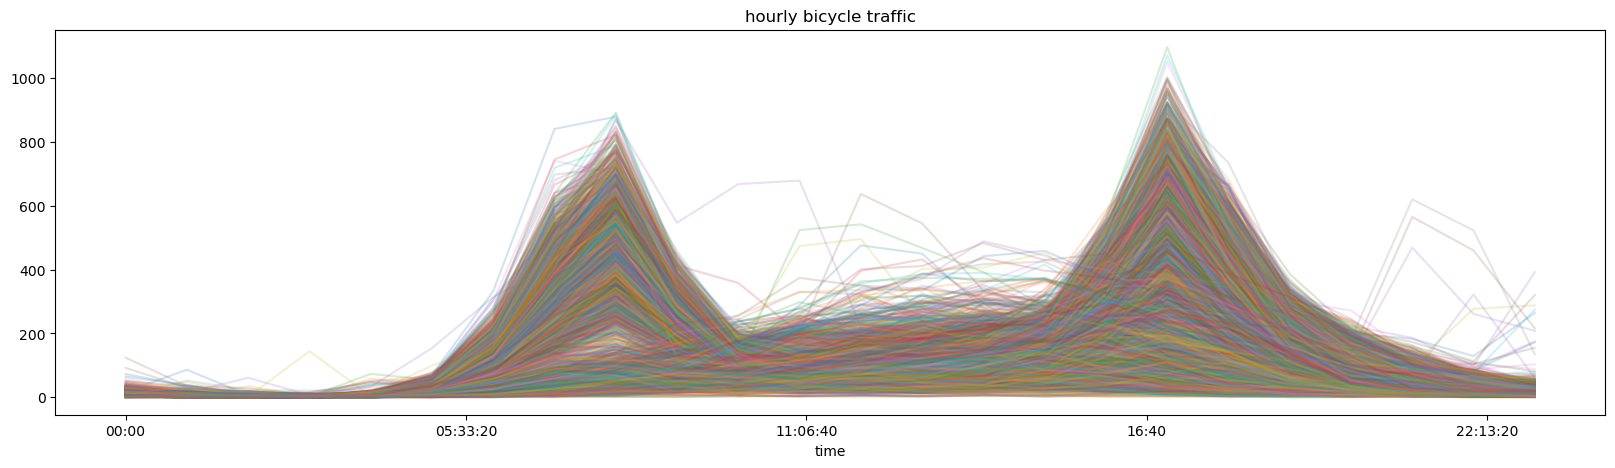

In [5]:
data_table.plot(legend=False,alpha=0.2, figsize=(20,5), title='hourly bicycle traffic')
#plt.title('hourly bicycle traffic (2012-2021)',fontsize=20)

In [6]:
days = data_table.T
from sklearn.cluster import KMeans

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['time']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['time']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['time']. An error will be raised in 1.2.
  warnings.warn(


Text(0, 0.5, 'inertia')

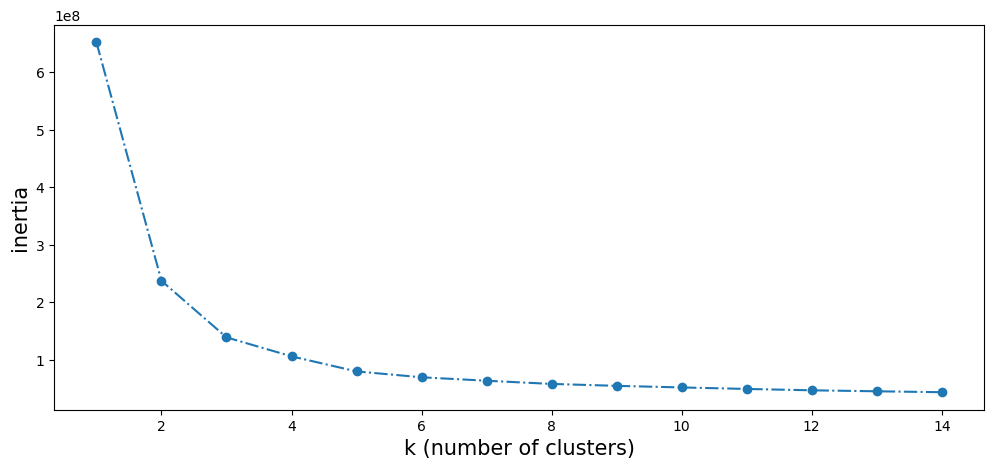

In [7]:
k_list = np.arange(1,15)
inertias = []
for k in k_list:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(days)
    inertias.append(kmeans.inertia_)
    
plt.figure(figsize=(12,5))
plt.plot(k_list,inertias,'o-.')
plt.xlabel('k (number of clusters)', fontsize=15)
plt.ylabel('inertia', fontsize=15)

In [8]:
# k=2,3,4 seems a good choice

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['time']. An error will be raised in 1.2.
  warnings.warn(


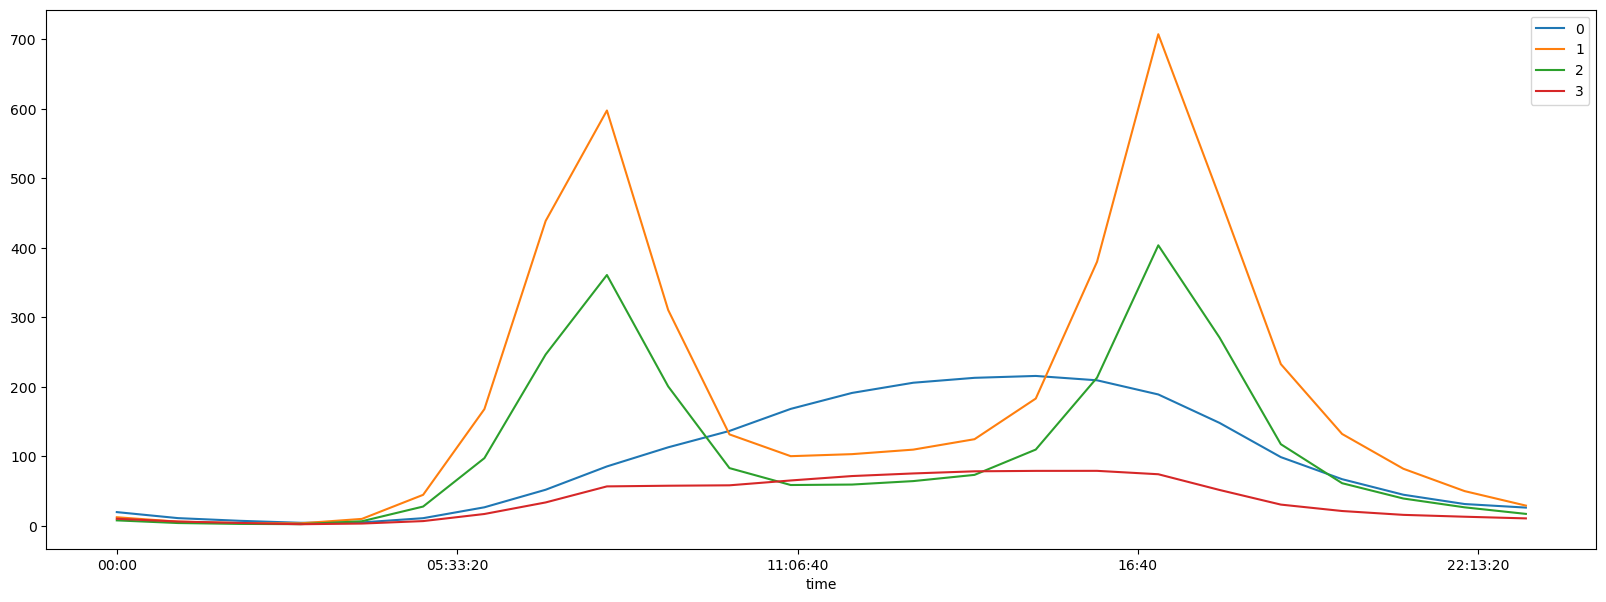

In [9]:
k = 4
cluster = KMeans(n_clusters=k)
cluster.fit(days)

centers = cluster.cluster_centers_
labels = cluster.labels_

cluster_centers = pd.DataFrame(centers.T, index=data_table.index)

# plot cluster centers
fig, ax = plt.subplots(figsize=(20,7))
for i in range(k):
    cluster_centers[i].plot(ax=ax)
plt.legend()

<AxesSubplot:xlabel='time'>

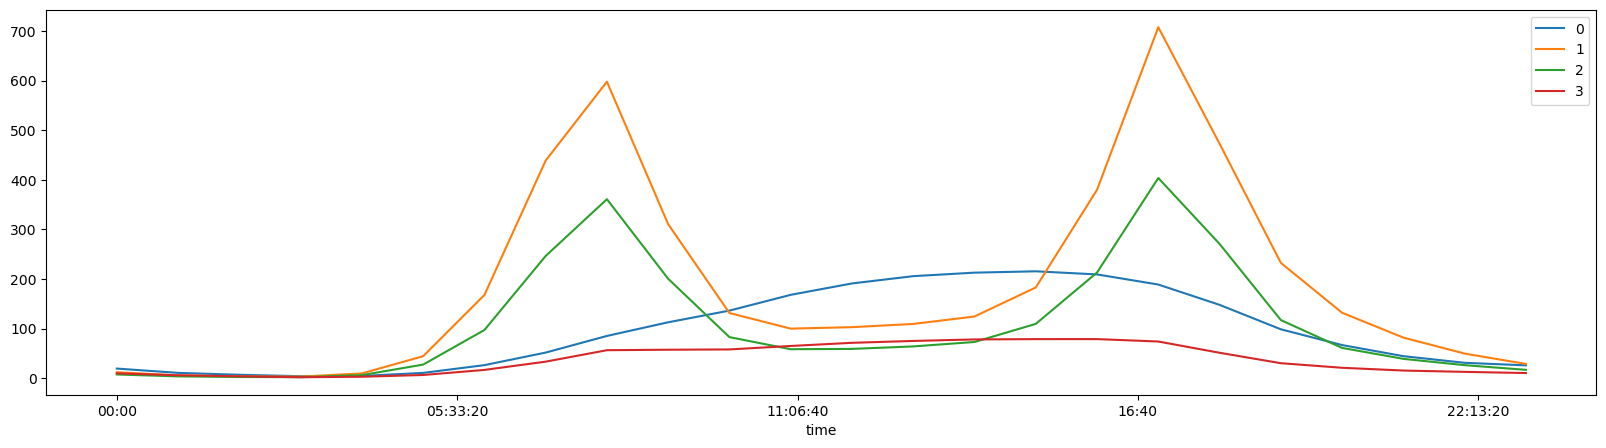

In [10]:
cluster_centers.plot(figsize=(20,5))

In [11]:
# clusters 0,2: weekdays
# clusters 1,3: weekends and holidays

In [12]:
pd.to_datetime(days[labels==0].index).dayofweek.value_counts()

6    183
5    180
0     24
4     14
3      9
1      8
2      7
dtype: int64

In [13]:
pd.to_datetime(days[labels==1].index).dayofweek.value_counts()

1    186
2    184
3    166
0    164
4    109
dtype: int64

## Example 2: image segmentation

The goal is to partition an image into multiple segments. In this example, we will cluster pixels based on color intensities (color segmentation).

In [14]:
import matplotlib.pyplot as plt

In [15]:
# load image
image = plt.imread('Tova_the_cat.png')

(-0.5, 293.5, 219.5, -0.5)

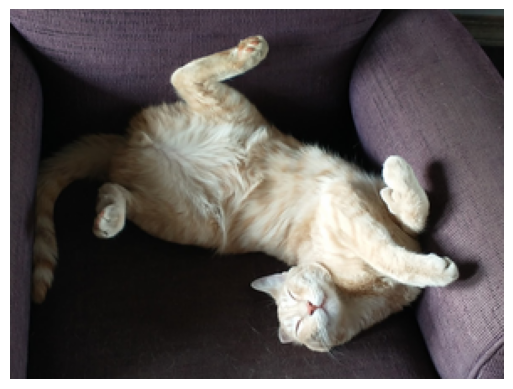

In [16]:
# display image
plt.imshow(image)
plt.axis(False)

In [17]:
# 220x294 pixels (3 color channels, red, green and blue)
image.shape

(220, 294, 3)

In [18]:
# reshape the array to get a long list of RGB colors
X = image.reshape(220*294,3)

In [19]:
from sklearn.cluster import KMeans

(-0.5, 293.5, 219.5, -0.5)

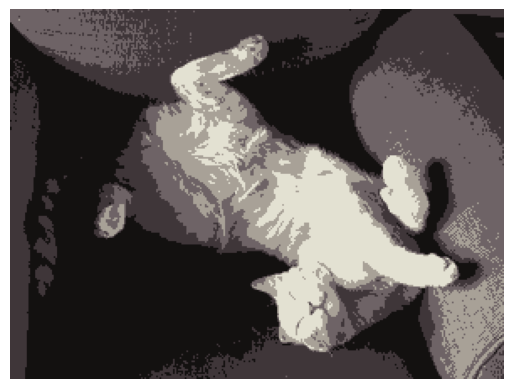

In [20]:
# cluster colors
k = 5
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
centers = kmeans.cluster_centers_
labels = kmeans.labels_
# replace each color by its cluster center
segmented_image = centers[labels].reshape(220,294,3)
# display segmented image
plt.imshow(segmented_image)
plt.axis(False)

## Example 3: topic modeling

The goal is to discover the latent "topics'' that occur in a collection of documents.

In [25]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.utils import Bunch

In [ ]:
categories = [
    'alt.atheism',
    'comp.windows.x',
    'rec.autos',
    'rec.sport.baseball',
    'sci.electronics',
    'sci.space',
]

docs = fetch_20newsgroups(subset='all', 
                                categories=categories,
                                remove=('headers', 'footers', 'quotes')
                          )

________________________________________________________________________________
Cache loading failed
________________________________________________________________________________
No module named 'sklearn.utils._bunch'


In [ ]:
data = pd.DataFrame({'doc' : docs['data'], 
                           'category' : docs['target']})
data.head()

In [ ]:
docs['target_names']

In [ ]:
# preprocess docs
import nltk 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')  
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()

def process_pos(pos):
    if pos.startswith('J'): # adjectives
        return wordnet.ADJ
    elif pos.startswith('V'): # verbes
        return wordnet.VERB
    elif pos.startswith('N'): # nouns
        return wordnet.NOUN
    elif pos.startswith('R'): # adverbs
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

import string
punctuation = [punc for punc in string.punctuation]

def process_text(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words]
    lemmatized_words = [lemmatizer.lemmatize(word, pos=process_pos(pos)) 
                        for word,pos in nltk.pos_tag(words) 
                        if word not in stop_words # remove stop words
                        and word not in punctuation # remove punctuations
 ] 
    return ' '.join(lemmatized_words)

In [ ]:
data['processed_doc'] = data.doc.apply(process_text)

In [ ]:
data.processed_doc[0]

In [ ]:
# word frequencies
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features=10000)

In [ ]:
X = vect.fit_transform(data.processed_doc)

In [ ]:
len(vect.get_feature_names())

In [ ]:
k = 15
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
labels = kmeans.labels_

In [ ]:
# clusters = topics?
cluster = 1
data.loc[labels==cluster,'category'].value_counts()

In [ ]:
# top 10 words in each cluster 
words_df = pd.DataFrame(data = X.toarray(),columns=vect.get_feature_names())
words_df

In [ ]:
for i in range(k):
    print('---------------------------')
    print(words_df[labels==i].mean().sort_values(ascending=False).head(10).index)
    print('---------------------------')

## Example 3: Customer segmentation

Customer segmentation is the process of dividing customers into groups based on common characteristics

In [ ]:
data = pd.read_csv('Mall_Customers.csv', index_col='CustomerID')
data.columns = ['gender','age','income','score']
data.head()

The dataset contains the basic information (ID, age, gender, income, spending score) about the customers.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.cluster import KMeans

In [ ]:
processor = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(),['gender']),
    ('scaler', MinMaxScaler(),['age','income','score'])
])


k = 5
pipe = Pipeline(steps=[
    ('processor',processor),
    ('clusterer',KMeans(n_clusters=k))
])

In [ ]:
pipe.fit(data)

In [ ]:
labels = pipe['clusterer'].labels_

- cluster 0: female, young, medium annual income, high score
- cluster 1: male, young, medium annual income, high score
- cluster 2: male, old, medium annual income, low score
- cluster 3: female, middle age, medium annual income, low score
- cluster 4: male, middle age, high annual income, low score

In [ ]:
cluster = 4
data.loc[labels==cluster,'gender'].value_counts()

In [ ]:
cluster = 4
data.loc[labels==cluster,'age'].mean()

In [ ]:
cluster = 4
data.loc[labels==cluster,'income'].mean()

In [ ]:
cluster = 4
data.loc[labels==cluster,'score'].mean()

In [ ]:
data.score.max(), data.score.min()